In [1]:
import os
from pathlib import Path
import pretty_midi
import numpy as np
import midi_utils as mu

In [2]:

# filesystem setup
src_folder = "all-time-micro"
input_path = os.path.join("data", src_folder)
output_path = os.path.join("data", "piano-rolls", src_folder)

if not os.path.exists(output_path):
  os.mkdir(output_path)

# data setup
fs = 100

for file in os.listdir(input_path):
  if file.endswith('.mid') or file.endswith('.midi'):
    filename = Path(file).stem
    file_path = os.path.join(input_path, file)
    midi = pretty_midi.PrettyMIDI(file_path)
    roll = midi.get_piano_roll(fs=fs)
    mu.draw_piano_roll(roll, fs, title=f"{filename} fs={fs}")
    np.save(os.path.join(output_path, f"{filename}_pr-{fs}.npy"), roll, allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: 'data/outputs/piano-rolls/all-time-micro'

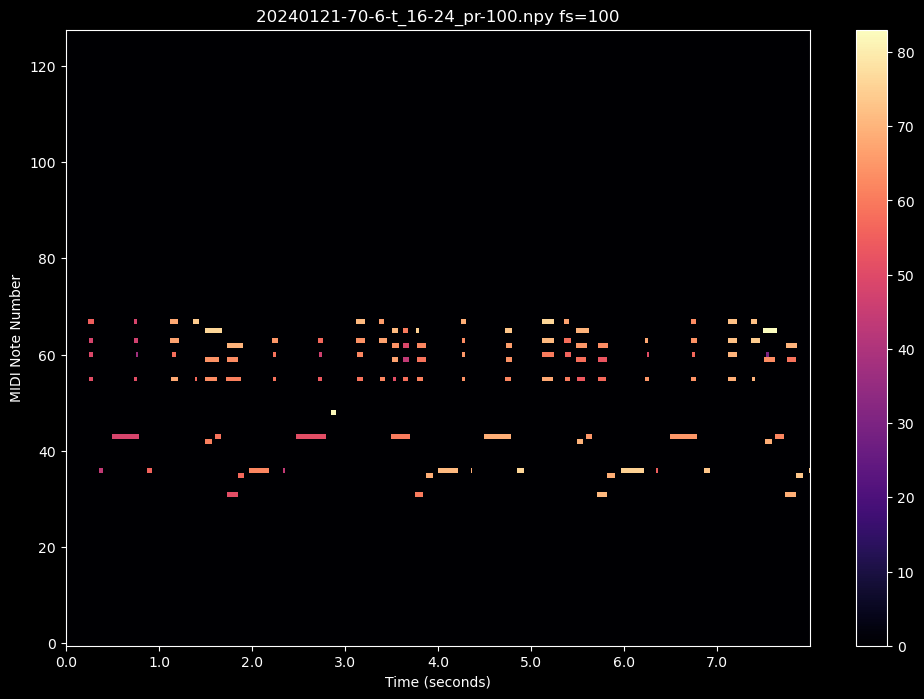

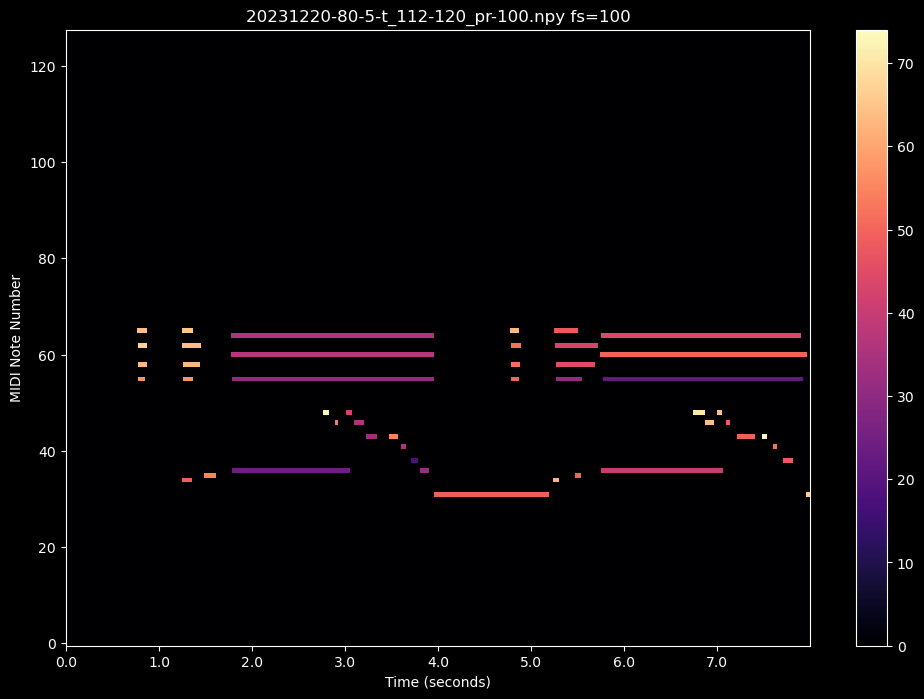

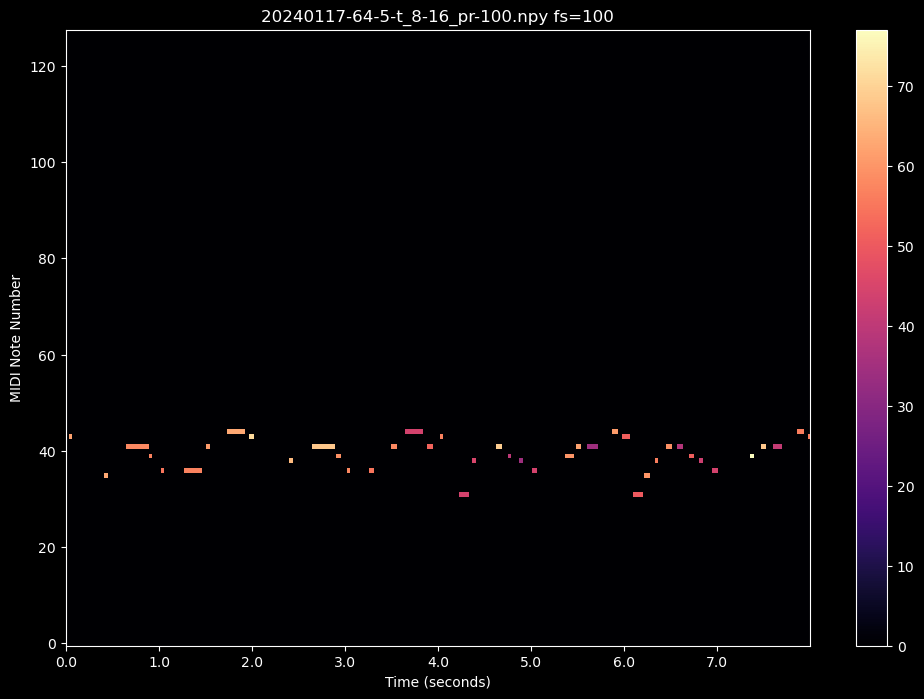

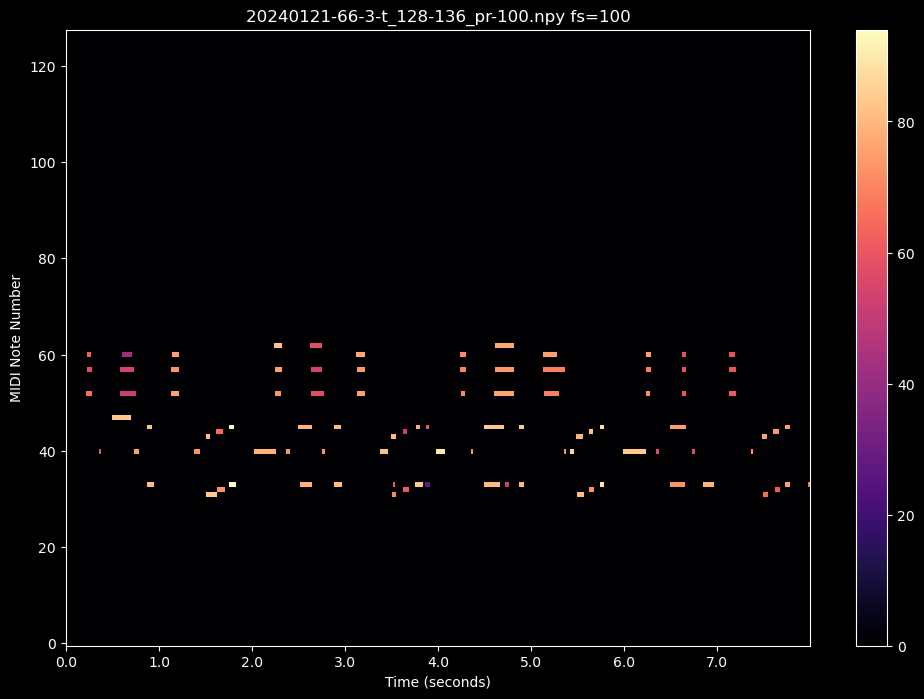

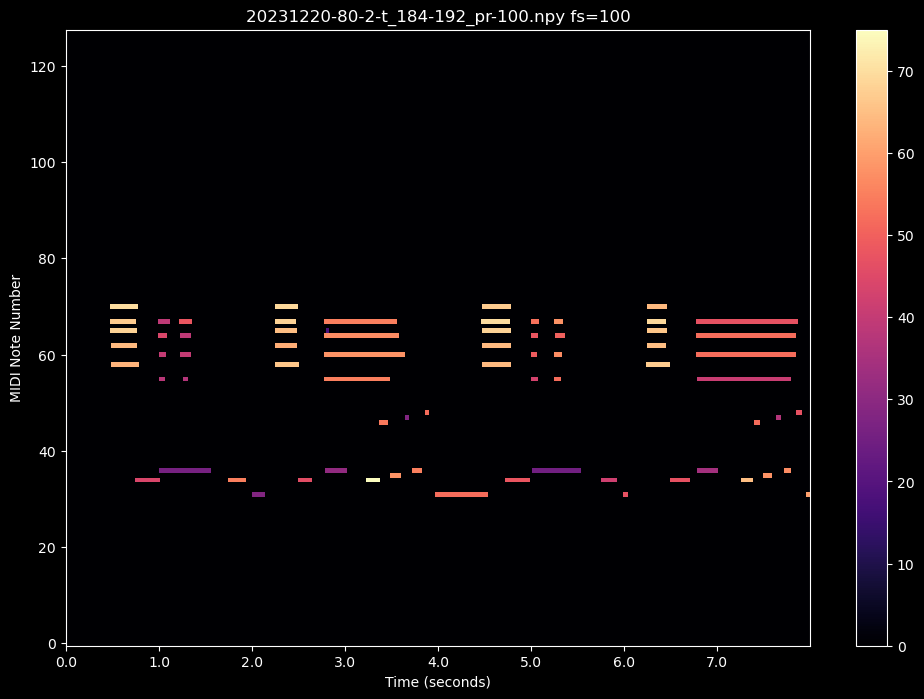

In [ ]:
for file in os.listdir(output_path):
  pr = np.load(os.path.join(output_path, file), allow_pickle=True)
  mu.draw_piano_roll(pr, fs, title=f"{file} fs={fs}")

In [3]:
import json

metrics = {}
metrics_file = os.path.join("data", "trimmed_outputs_metrics.json")
total_plot_histograms = np.zeros((12, 1))
with open(metrics_file, 'r') as f:
  metrics = json.load(f)

for file, metrics in metrics.items():
  hist = metrics['pitch_histogram']
  print(f"{file} -> {hist}")
  total_plot_histograms += hist

total_plot_histograms

20240121-66-2-t.mid
20231228-72-1-t.mid
20240121-70-9-t.mid
20240121-66-3-t.mid
20240121-66-1-t.mid
20240121-70-8-t.mid
20240121-70-6-t.mid
20240117-64-3-t.mid
20240121-70-4-t.mid
20240117-64-1-t.mid
20231220-80-5-t.mid
20231227-80-2-t.mid
20231227-80-6-t.mid
20240117-64-5-t.mid
20231220-80-1-t.mid
20231220-80-3-t.mid
20240121-70-2-t.mid
20231227-80-4-t.mid
20231220-80-4-t.mid
20240121-70-5-t.mid
20231227-80-3-t.mid
20231227-80-1-t.mid
20240117-64-2-t.mid
20240121-70-7-t.mid
20231220-80-6-t.mid
20240121-70-3-t.mid
20240117-64-6-t.mid
20231220-80-2-t.mid
20231227-80-5-t.mid
20240121-70-1-t.mid
20240117-64-4-t.mid


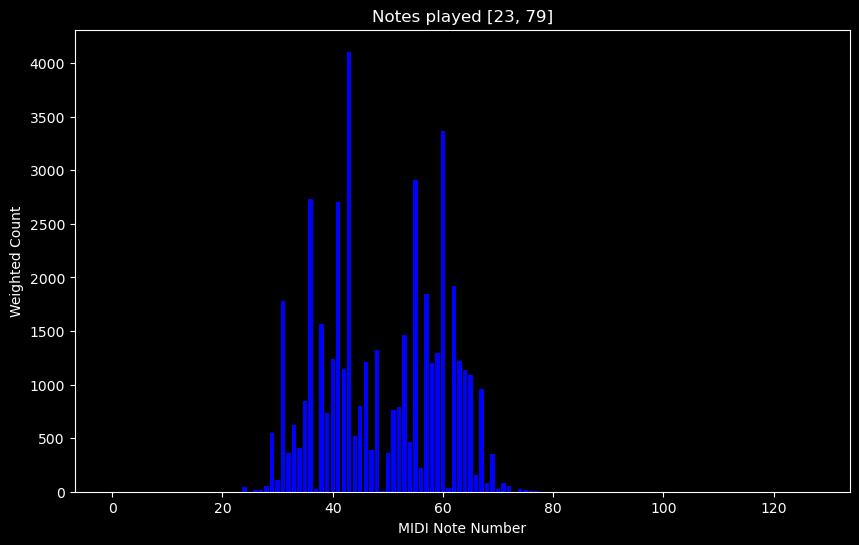

23 - 79


In [11]:
import matplotlib.pyplot as plt

def generate_note_histogram(folder_path, length_weight=1.0, velocity_weight=1.0):
    """
    Generates a histogram of notes from a folder of MIDI files, weighted by note lengths and velocities.

    Args:
    folder_path (str): Path to the folder containing MIDI files.
    length_weight (float): Weighting factor for note lengths.
    velocity_weight (float): Weighting factor for velocities.
    """
    note_histogram = [0] * 128
    note_max = -1
    note_min = 128

    for filename in os.listdir(folder_path):
        if filename.endswith('.mid') or filename.endswith('.midi'):
            # calc histogram
            midi_path = os.path.join(folder_path, filename)
            bpm = int(filename.split('-')[1])
            midi_data = pretty_midi.PrettyMIDI(midi_path, initial_tempo=bpm)

            for instrument in midi_data.instruments:
                for note in instrument.notes:
                    # note_duration = note.end - note.start
                    # note_weight = (note_duration ** length_weight) * (note.velocity ** velocity_weight)
                    # note_histogram[note.pitch] += note_weight
                    note_histogram[note.pitch] += 1
            
            # update max & min
            nz_rows = np.where(np.any(midi_data.get_piano_roll() > 0, axis=1))[0]
            note_min = note_min if note_min < nz_rows.min() else nz_rows.min()
            note_max = note_max if note_max > nz_rows.max() else nz_rows.max()

    plt.figure(figsize=(10, 6))
    plt.bar(range(128), note_histogram, color='blue')
    plt.xlabel('MIDI Note Number')
    plt.ylabel('Weighted Count')
    plt.title(f'Notes played [{min}, {max}]')
    plt.show()

    return [note_min, note_max]

min, max = generate_note_histogram(os.path.join("data", "trimmed outputs"), length_weight=1.0, velocity_weight=1.0)